In [1]:
import sys
sys.path.append('../..')

import eeg_decoder
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'


np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = './data'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)
erp = eeg_decoder.ERP(exp,subtitle=experiment_name)
xdata_all, ydata_all = erp.load_all_eeg()

In [3]:
palette = {
'1 Color': 'sienna',
'3 Color': 'gold',
'1 Orientation': 'indigo',
'3 Orientation': 'deeppink',
}

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


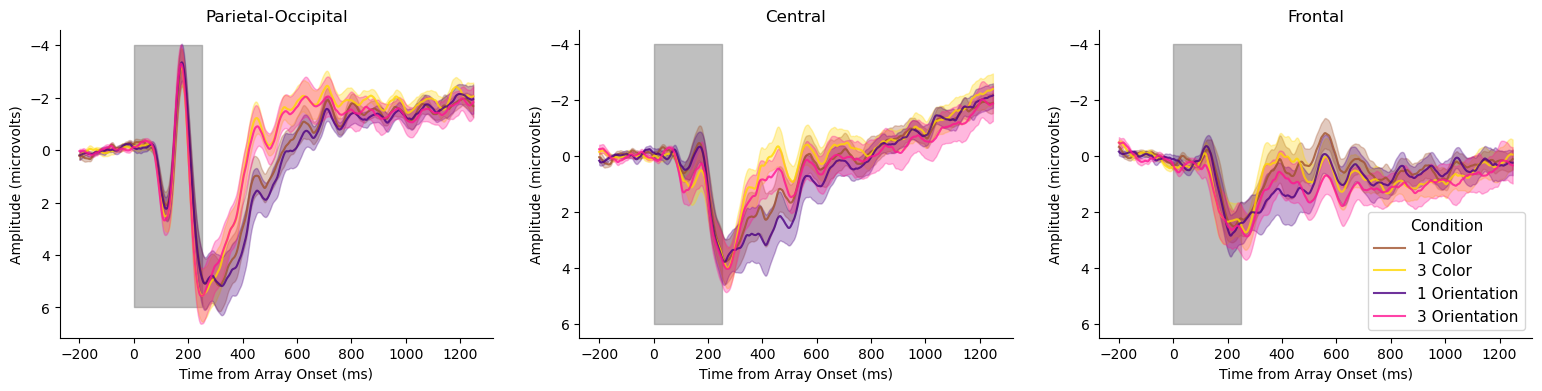

In [4]:
fig,axes = plt.subplots(1,3,figsize=(19,4))
for isubset,(subtitle,subset) in enumerate(zip(['Parietal-Occipital','Central','Frontal'],[('P','O'),('C'),('F')])):

    erp.plot_ss(
        xdata_all, ydata_all,
        ax = axes[isubset], 
        electrode_subset=subset, 
        condition_labels=['1 Color','3 Color','1 Orientation','3 Orientation'],
        palette=palette)
    
    axes[isubset].set_title(subtitle)
plt.savefig('output/figures/erp.png',dpi=500,bbox_inches='tight')
plt.savefig('output/figures/erp.svg',bbox_inches='tight')
plt.show()